In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Load the synthetic data

In [248]:
# Load the synthetic data
data = pd.read_csv('dummy_demand_data.csv')
data.head()

,Date,Product,Demand
0,2019-01-01,Product A,57
1,2019-01-01,Product B,68
2,2019-01-01,Product C,98
3,2019-01-02,Product A,64
4,2019-01-02,Product B,98


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4383 non-null   object
 1   Product  4383 non-null   object
 2   Demand   4383 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 102.9+ KB


In [250]:
data.shape

(4383, 3)

Data Preprocessing

In [251]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Date       0
Product    0
Demand     0
dtype: int64


In [252]:

# Handle missing values (replace with mean in this example)
data['Demand'].fillna(data['Demand'].mean(), inplace=True)


In [253]:
# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

In [254]:
# Perform one-hot encoding for the 'Product' column
data = pd.get_dummies(data, columns=['Product'], prefix=['Product'], drop_first=True)


In [255]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
#data.reset_index()



In [256]:

# Sort the data by date
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Demand,Product_Product B,Product_Product C
0,2019-01-01,57,False,False
1,2019-01-01,68,True,False
2,2019-01-01,98,False,True
3,2019-01-02,64,False,False
4,2019-01-02,98,True,False


In [257]:
data.head()

,Date,Demand,Product_Product B,Product_Product C
0,2019-01-01,57,False,False
1,2019-01-01,68,True,False
2,2019-01-01,98,False,True
3,2019-01-02,64,False,False
4,2019-01-02,98,True,False


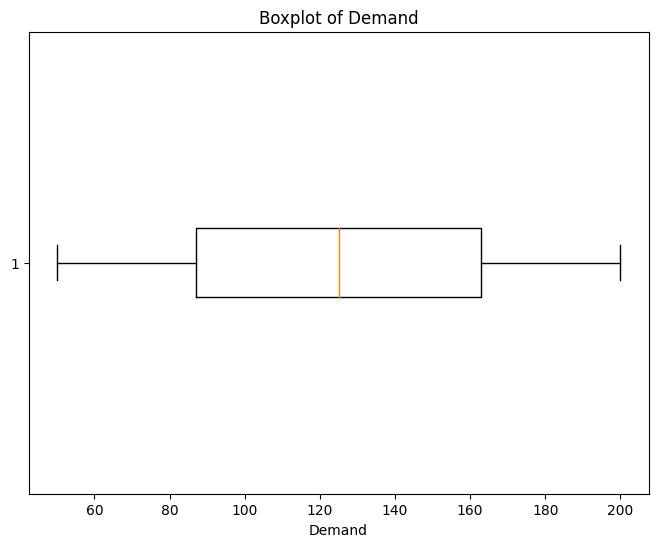

In [258]:

# Create a boxplot of the 'Demand' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Demand'], vert=False)
plt.title('Boxplot of Demand')
plt.xlabel('Demand')
plt.show()

In [259]:
# Outlier detection using Interquartile Range (IQR)
Q1 = data['Demand'].quantile(0.25)
Q3 = data['Demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = data[(data['Demand'] < lower_bound) | (data['Demand'] > upper_bound)]
data = data[~data.index.isin(outliers.index)]

set Date column as the index

In [260]:
# Set 'Date' column as the index
data.set_index('Date', inplace=True)
data.head()

,Demand,Product_Product B,Product_Product C
Date,,,
2019-01-01,57,False,False
2019-01-01,68,True,False
2019-01-01,98,False,True
2019-01-02,64,False,False
2019-01-02,98,True,False


## Feature Engineering

Lagged Demand (Historical Demand)

In [261]:
# Assuming your data is already sorted by date
data['Demand(t-1)'] = data['Demand'].shift(1)
data['Demand(t-2)'] = data['Demand'].shift(2)


Time-Based Features (Year, Month, Day of the Week)

In [262]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek



Interaction Terms

In [263]:
data['Product_Product B * Demand'] = data['Product_Product B'] * data['Demand']
data['Product_Product C * Demand'] = data['Product_Product C'] * data['Demand']


In [264]:
data.head()

,Demand,Product_Product B,Product_Product C,Demand(t-1),Demand(t-2),Year,Month,DayOfWeek,Product_Product B * Demand,Product_Product C * Demand
Date,,,,,,,,,,
2019-01-01,57,False,False,NaN,NaN,2019,1,1,0,0
2019-01-01,68,True,False,57.0,NaN,2019,1,1,68,0
2019-01-01,98,False,True,68.0,57.0,2019,1,1,0,98
2019-01-02,64,False,False,98.0,68.0,2019,1,2,0,0
2019-01-02,98,True,False,64.0,98.0,2019,1,2,98,0


In [265]:
# Count missing values in each column
missing_values = data.isna().sum()

# Display the count of missing values
print(missing_values)


Demand                        0
Product_Product B             0
Product_Product C             0
Demand(t-1)                   1
Demand(t-2)                   2
Year                          0
Month                         0
DayOfWeek                     0
Product_Product B * Demand    0
Product_Product C * Demand    0
dtype: int64


Forward fill missing values

In [266]:
# Fill the missing value in the first row of 'Demand(t-1)' with forward fill using obj.ffill()
data['Demand(t-1)'] = data['Demand(t-1)'].bfill()

# Display the DataFrame
data.head()


,Demand,Product_Product B,Product_Product C,Demand(t-1),Demand(t-2),Year,Month,DayOfWeek,Product_Product B * Demand,Product_Product C * Demand
Date,,,,,,,,,,
2019-01-01,57,False,False,57.0,NaN,2019,1,1,0,0
2019-01-01,68,True,False,57.0,NaN,2019,1,1,68,0
2019-01-01,98,False,True,68.0,57.0,2019,1,1,0,98
2019-01-02,64,False,False,98.0,68.0,2019,1,2,0,0
2019-01-02,98,True,False,64.0,98.0,2019,1,2,98,0


In [267]:

# Backfill the missing values at the beginning of 'Demand(t-2)'
data['Demand(t-2)'] = data['Demand(t-2)'].bfill()

# Display the DataFrame
data.head()


,Demand,Product_Product B,Product_Product C,Demand(t-1),Demand(t-2),Year,Month,DayOfWeek,Product_Product B * Demand,Product_Product C * Demand
Date,,,,,,,,,,
2019-01-01,57,False,False,57.0,57.0,2019,1,1,0,0
2019-01-01,68,True,False,57.0,57.0,2019,1,1,68,0
2019-01-01,98,False,True,68.0,57.0,2019,1,1,0,98
2019-01-02,64,False,False,98.0,68.0,2019,1,2,0,0
2019-01-02,98,True,False,64.0,98.0,2019,1,2,98,0


In [270]:
# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_demand_data.csv', index=True)

# Display the first few rows of the preprocessed data
print("Preprocessed Data:\n", data.head())


Preprocessed Data:
             Demand  Product_Product B  Product_Product C  Demand(t-1)  \
Date                                                                    
2019-01-01      57              False              False         57.0   
2019-01-01      68               True              False         57.0   
2019-01-01      98              False               True         68.0   
2019-01-02      64              False              False         98.0   
2019-01-02      98               True              False         64.0   

            Demand(t-2)  Year  Month  DayOfWeek  Product_Product B * Demand  \
Date                                                                          
2019-01-01         57.0  2019      1          1                           0   
2019-01-01         57.0  2019      1          1                          68   
2019-01-01         57.0  2019      1          1                           0   
2019-01-02         68.0  2019      1          2                          

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2019-01-01 to 2022-12-31
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Demand                      4383 non-null   int64  
 1   Product_Product B           4383 non-null   bool   
 2   Product_Product C           4383 non-null   bool   
 3   Demand(t-1)                 4383 non-null   float64
 4   Demand(t-2)                 4383 non-null   float64
 5   Year                        4383 non-null   int32  
 6   Month                       4383 non-null   int32  
 7   DayOfWeek                   4383 non-null   int32  
 8   Product_Product B * Demand  4383 non-null   int64  
 9   Product_Product C * Demand  4383 non-null   int64  
dtypes: bool(2), float64(2), int32(3), int64(3)
memory usage: 265.4 KB


# Demand Forecasting Model

In [272]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [337]:

# Load the preprocessed data
data = pd.read_csv('preprocessed_demand_data.csv', index_col=0)
data.head()

,Demand,Product_Product B,Product_Product C,Demand(t-1),Demand(t-2),Year,Month,DayOfWeek,Product_Product B * Demand,Product_Product C * Demand
Date,,,,,,,,,,
2019-01-01,57,False,False,57.0,57.0,2019,1,1,0,0
2019-01-01,68,True,False,57.0,57.0,2019,1,1,68,0
2019-01-01,98,False,True,68.0,57.0,2019,1,1,0,98
2019-01-02,64,False,False,98.0,68.0,2019,1,2,0,0
2019-01-02,98,True,False,64.0,98.0,2019,1,2,98,0


Define features and Target variable

In [297]:
# Define all relevant features and the target variable
features = [
    'Demand(t-1)',
    'Demand(t-2)',
    'Product_Product B',
    'Product_Product C',
    'Year',
    'Month',
    'DayOfWeek',
    'Product_Product B * Demand',
    'Product_Product C * Demand'
]

target = 'Demand'

# Create feature matrix X and target vector y
X = data[features]
y = data[target]





Split the data into training and testing sets (80% training, 20%)

In [338]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, shuffle=False)

# Verify the shapes of the training and testing sets
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (3506, 9)
Testing Data Shape: (877, 9)


## Baseline Model

In [311]:
# Calculate the historical average of the target variable (Demand)
historical_average = y_train.mean()

# Create an array of historical average values for the test set (same length as y_test)
baseline_predictions = np.full_like(y_test, fill_value=historical_average)

# Evaluate the baseline model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print(f'Baseline Model MAE: {baseline_mae:.2f}')
print(f'Baseline Model RMSE: {baseline_rmse:.2f}')


Baseline Model MAE: 38.07
Baseline Model RMSE: 43.91


Train Random Forest model

In [299]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Make Predictions on the test data

In [300]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the prediction errors
prediction_errors = y_test - y_pred

# Calculate the standard error of prediction errors
standard_error = np.std(prediction_errors)

# Calculate the margin of error using the Z-score
margin_of_error = z_score * standard_error

# Set the upper and lower interval values
lower_interval = y_pred - margin_of_error
upper_interval = y_pred + margin_of_error




Evaluate the Model (MAE and RMSE)

In [301]:

# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 13.13
RMSE: 26.07


In [302]:
# Create a DataFrame to display actual and forecasted values
results_df = pd.DataFrame({'Actual Demand': y_test, 'Forecasted Demand': y_pred, 'Prediction Error': prediction_errors}, index=X_test.index)

# Print the table of actual and forecasted values
print("Actual vs. Forecasted Demand:")
print(results_df.to_string())


Actual vs. Forecasted Demand:
            Actual Demand  Forecasted Demand  Prediction Error
Date                                                          
2022-03-14             58             123.46            -65.46
2022-03-15             52             124.06            -72.06
2022-03-15            159             159.01             -0.01
2022-03-15            110             109.97              0.03
2022-03-16             96             148.21            -52.21
2022-03-16             78              77.95              0.05
2022-03-16             92              92.00              0.00
2022-03-17            161             160.99              0.01
2022-03-17            166             128.19             37.81
2022-03-17             69              69.00              0.00
2022-03-18            150             133.99             16.01
2022-03-18             69              69.00              0.00
2022-03-18            122             122.00              0.00
2022-03-19             79

Visualize Predicted and Actual Values

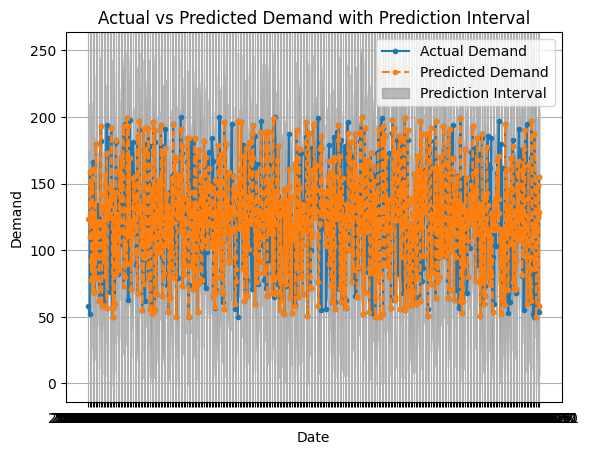

In [306]:
# Assuming you have upper and lower prediction intervals (e.g., based on quantiles)

plt.plot(X_test.index, y_test, label='Actual Demand', linestyle='-', marker='o', markersize=3)
plt.plot(X_test.index, y_pred, label='Predicted Demand', linestyle='--', marker='o', markersize=3)
plt.fill_between(X_test.index, lower_interval, upper_interval, color='gray', alpha=0.5, label='Prediction Interval')

plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs Predicted Demand with Prediction Interval')
plt.grid(True)
plt.show()


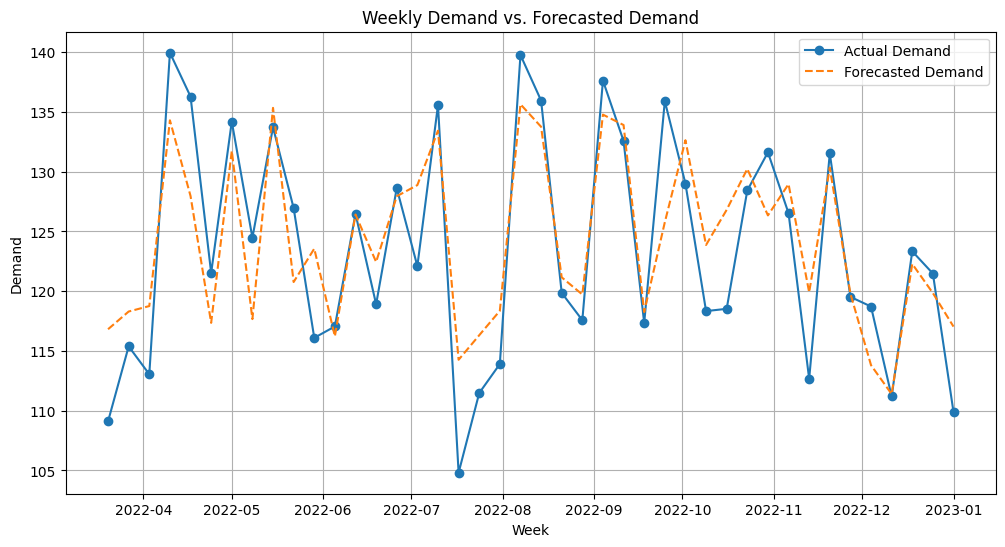

In [309]:
# Convert the index to a DatetimeIndex
results_df.index = pd.to_datetime(results_df.index)# Resample to weekly frequency and aggregate using mean

weekly_data = results_df.resample('W').mean()

# Plot the downsampled data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Actual Demand'], label='Actual Demand', marker='o')
plt.plot(weekly_data.index, weekly_data['Forecasted Demand'], label='Forecasted Demand', linestyle='--')
plt.xlabel('Week')
plt.ylabel('Demand')
plt.legend()
plt.title('Weekly Demand vs. Forecasted Demand')
plt.grid(True)
plt.show()



## Feature Importance

In [314]:
from sklearn.ensemble import RandomForestRegressor

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                      Feature  Importance
7  Product_Product B * Demand    0.318209
8  Product_Product C * Demand    0.310772
0                 Demand(t-1)    0.100116
1                 Demand(t-2)    0.098699
5                       Month    0.052941
6                   DayOfWeek    0.043196
3           Product_Product C    0.030586
4                        Year    0.024236
2           Product_Product B    0.021245


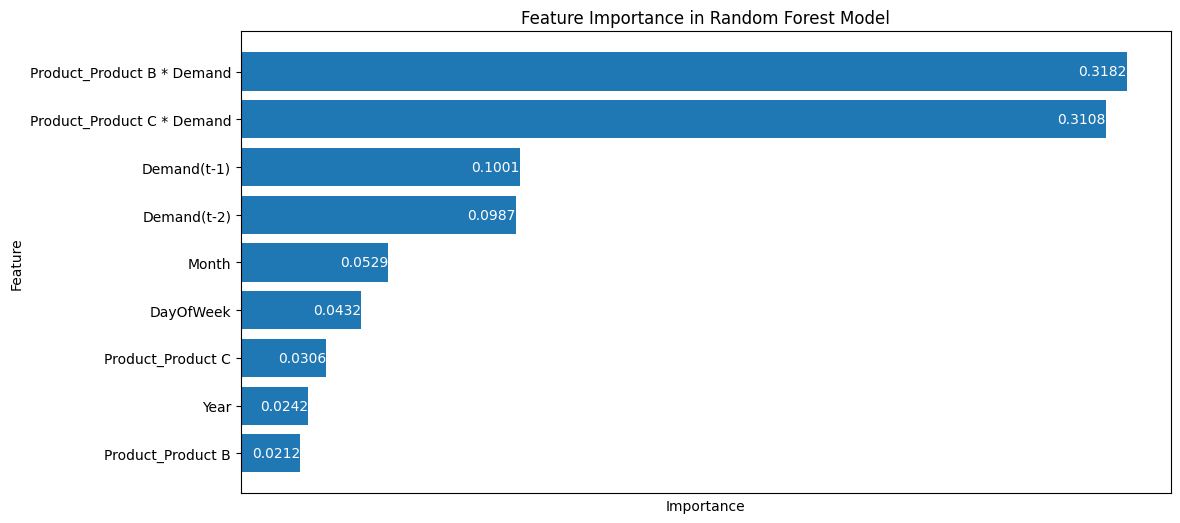

In [324]:

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="blue")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Reverse the order for better visualization


# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', ha='right', va='center', color='white')

# Remove the x-axis tick marks and values
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.show()


# ARIMA Model

In [330]:
from statsmodels.tsa.arima.model import ARIMA

In [350]:
# Load the synthetic data
data = pd.read_csv('dummy_demand_data.csv')
data.head()

,Date,Product,Demand
0,2019-01-01,Product A,57
1,2019-01-01,Product B,68
2,2019-01-01,Product C,98
3,2019-01-02,Product A,64
4,2019-01-02,Product B,98


In [359]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
#data.reset_index()

In [360]:
arima_df = data[['Date', 'Product', 'Demand']].copy()

In [361]:
arima_df.set_index('Date', inplace=True)
arima_df.head()

,Product,Demand
Date,,
2019-01-01,Product A,57
2019-01-01,Product B,68
2019-01-01,Product C,98
2019-01-02,Product A,64
2019-01-02,Product B,98


In [362]:
arima_df['Year'] = arima_df.index.year
arima_df['Month'] = arima_df.index.month
arima_df['DayOfWeek'] = arima_df.index.dayofweek


In [363]:
arima_df.head()

,Product,Demand,Year,Month,DayOfWeek
Date,,,,,
2019-01-01,Product A,57,2019,1,1
2019-01-01,Product B,68,2019,1,1
2019-01-01,Product C,98,2019,1,1
2019-01-02,Product A,64,2019,1,2
2019-01-02,Product B,98,2019,1,2


In [364]:
# Assuming df is your original dataset
product_a_df = arima_df[arima_df['Product'] == 'Product A']
product_b_df = arima_df[arima_df['Product'] == 'Product B']
product_c_df = arima_df[arima_df['Product'] == 'Product C']

In [365]:
product_a_df.head()

,Product,Demand,Year,Month,DayOfWeek
Date,,,,,
2019-01-01,Product A,57,2019,1,1
2019-01-02,Product A,64,2019,1,2
2019-01-03,Product A,103,2019,1,3
2019-01-04,Product A,112,2019,1,4
2019-01-05,Product A,124,2019,1,5


# Model Comparison

In [312]:
import pandas as pd

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({
    'Model': ['Baseline', 'Random Forest'],
    'MAE': [baseline_mae, mae],
    'RMSE': [baseline_rmse, rmse]
})

# Print the comparison table
print("MAE and RMSE Comparison:")
print(comparison_df)


MAE and RMSE Comparison:
           Model        MAE       RMSE
0       Baseline  38.069555  43.907166
1  Random Forest  13.126499  26.071444


In [367]:

#Save the trained RF model for future use
import joblib
joblib.dump(rf_model, 'demand_forecasting_model.pkl')


['demand_forecasting_model.pkl']